In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from PIL import Image
from tqdm import tqdm
import random as rnd
import cv2

from livelossplot import PlotLossesKeras

%matplotlib inline

In [4]:
HWAD = './happy-whale-and-dolphin/'
TRAIN_DIR = './happy-whale-and-dolphin/train_images/'
TEST_DIR = './happy-whale-and-dolphin/test_images/'

train_df = pd.read_csv(HWAD + 'train2.csv')
train_df['path'] = TRAIN_DIR + train_df['image']

pred_df = pd.read_csv(HWAD + 'sample_submission.csv')
pred_df['path'] = TEST_DIR + pred_df['image']

train_df.head()

image             species individual_id  \
0  00021adfb725ed.jpg  melon_headed_whale  cadddb1636b9   
1  000562241d384d.jpg      humpback_whale  1a71fbb72250   
2  0007c33415ce37.jpg  false_killer_whale  60008f293a2b   
3  0007d9bca26a99.jpg  bottlenose_dolphin  4b00fe572063   
4  00087baf5cef7a.jpg      humpback_whale  8e5253662392   

                                                path    class  count  width  \
0  ./happy-whale-and-dolphin/train_images/00021ad...    whale      1    804   
1  ./happy-whale-and-dolphin/train_images/0005622...    whale      2   3504   
2  ./happy-whale-and-dolphin/train_images/0007c33...    whale     64   3599   
3  ./happy-whale-and-dolphin/train_images/0007d9b...  dolphin     65   3504   
4  ./happy-whale-and-dolphin/train_images/00087ba...    whale     50   3599   

   height  dimension  
0     671     539484  
1    2336    8185344  
2    2399    8634001  
3    2336    8185344  
4    2699    9713701

In [3]:
train_df['species'].replace({
    'bottlenose_dolpin' : 'bottlenose_dolphin',
    'kiler_whale' : 'killer_whale',
    'beluga' : 'beluga_whale',
    'globis' : 'short_finned_pilot_whale',
    'pilot_whale' : 'short_finned_pilot_whale'
},inplace =True)


train_df['class'] = train_df['species'].apply(lambda x: x.split('_')[-1])
train_df.head()

C:\Users\domen\AppData\Local\Temp\ipykernel_18116\1299628631.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['species'].replace({


image             species individual_id  \
0  00021adfb725ed.jpg  melon_headed_whale  cadddb1636b9   
1  000562241d384d.jpg      humpback_whale  1a71fbb72250   
2  0007c33415ce37.jpg  false_killer_whale  60008f293a2b   
3  0007d9bca26a99.jpg  bottlenose_dolphin  4b00fe572063   
4  00087baf5cef7a.jpg      humpback_whale  8e5253662392   

                                                path    class  
0  ./happy-whale-and-dolphin/train_images/00021ad...    whale  
1  ./happy-whale-and-dolphin/train_images/0005622...    whale  
2  ./happy-whale-and-dolphin/train_images/0007c33...    whale  
3  ./happy-whale-and-dolphin/train_images/0007d9b...  dolphin  
4  ./happy-whale-and-dolphin/train_images/00087ba...    whale

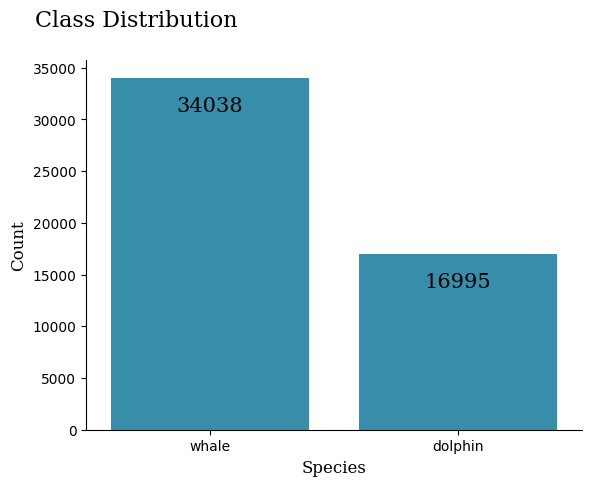

In [52]:


plot = sns.countplot(x = train_df['class'], color = '#2596be')
sns.despine()
plot.set_title('Class Distribution\n', font = 'serif', x = 0.1, y=1, fontsize = 16);
plot.set_ylabel("Count", x = 0.02, font = 'serif', fontsize = 12)
plot.set_xlabel("Species", fontsize = 12, font = 'serif')

for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2, p.get_height()), 
       ha = 'center', va = 'center', xytext = (0, -20),font = 'serif', textcoords = 'offset points', size = 15)



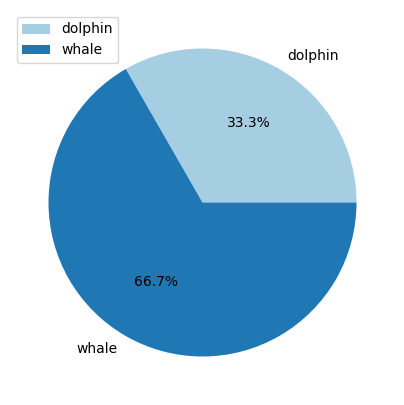

In [53]:


plt.figure(figsize=(5,5))
class_cnt = train_df.groupby(['class']).size().reset_index(name = 'counts')
colors = sns.color_palette('Paired')[0:9]
plt.pie(class_cnt['counts'], labels=class_cnt['class'], colors=colors, autopct='%1.1f%%')
plt.legend(loc='upper left')
plt.show()

C:\Users\domen\AppData\Local\Temp\ipykernel_19328\3641098070.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, y = 'species',  palette='crest', dodge=False)


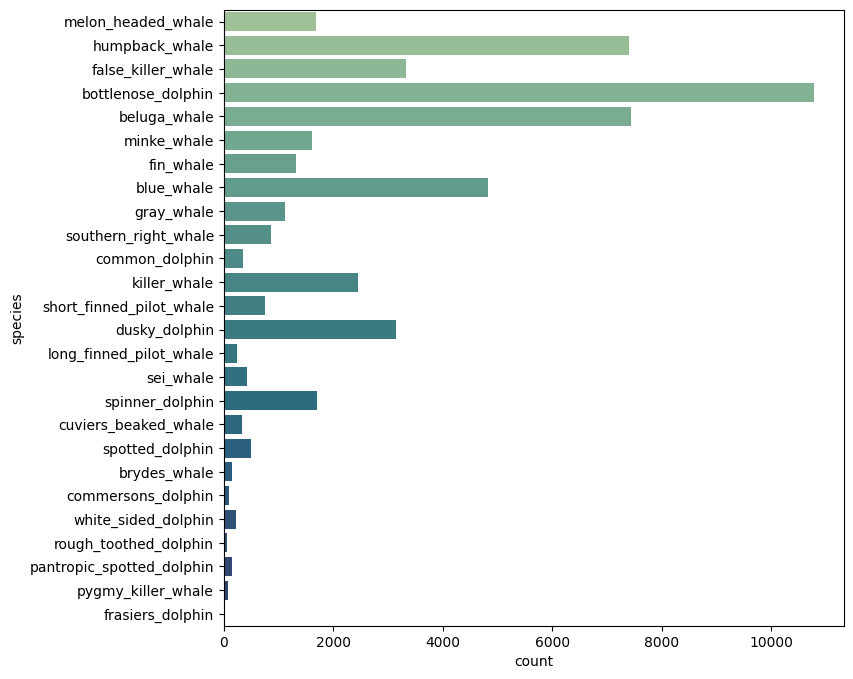

In [54]:


plt.figure(figsize=(8,8))
sns.countplot(data=train_df, y = 'species',  palette='crest', dodge=False)
plt.show()



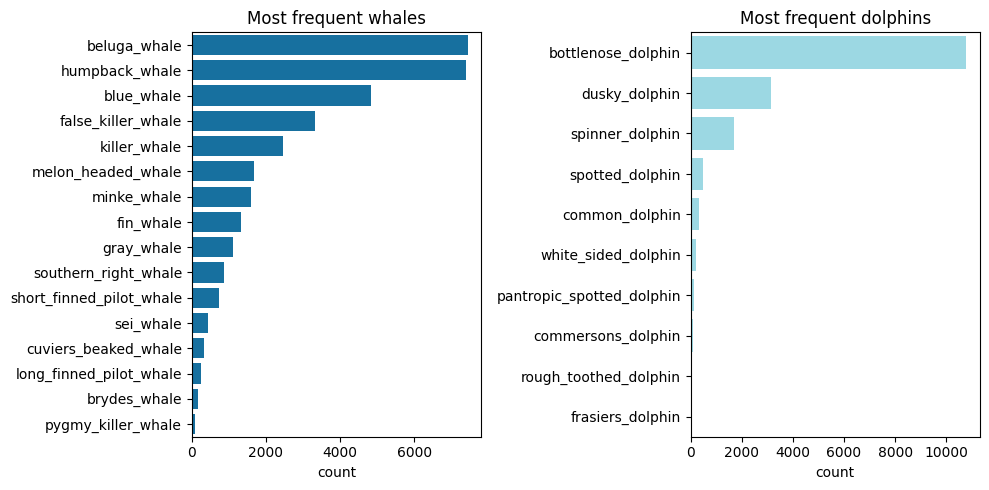

In [55]:


fig,ax = plt.subplots(1,2,figsize=(10,5))

whales = train_df[train_df['class']=='whale']
dolphins = train_df[train_df['class']!='whale']

sns.countplot(y="species", data=whales, order=whales.iloc[0:]["species"].value_counts().index, ax=ax[0], color = "#0077b6")
ax[0].set_title('Most frequent whales')
ax[0].set_ylabel(None)
    
sns.countplot(y="species", data=dolphins,order=dolphins.iloc[0:]["species"].value_counts().index, ax=ax[1], color = "#90e0ef")
ax[1].set_title('Most frequent dolphins')
ax[1].set_ylabel(None)

plt.tight_layout()
plt.show()



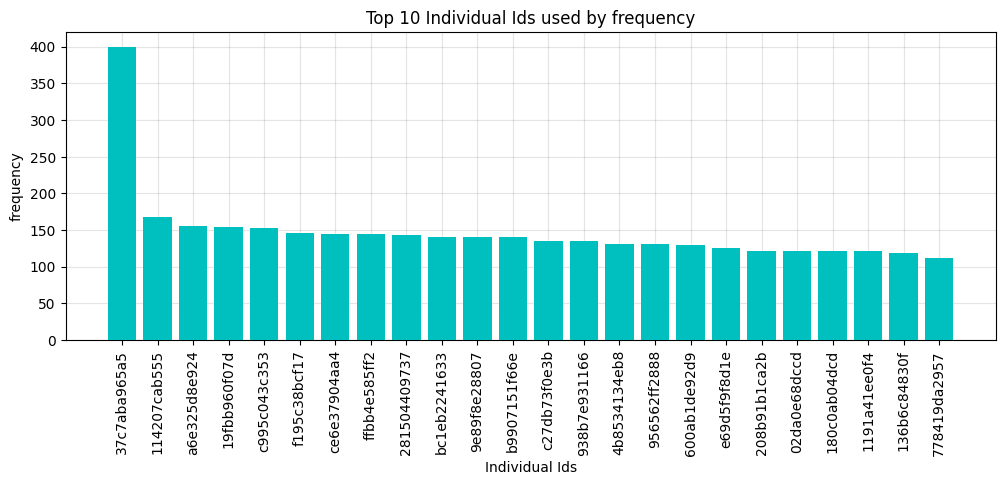

In [56]:


plt.figure(figsize=(12,4))
top_ten_ids = train_df.individual_id.value_counts().head(24)
top_ten_ids = pd.DataFrame({'individual_id':top_ten_ids.index, 'frequency':top_ten_ids.values})

plt.bar(top_ten_ids['individual_id'],top_ten_ids['frequency'],width = 0.8,color='c',zorder=4)
plt.xticks(rotation=90)
plt.ylabel("frequency")
plt.xlabel("Individual Ids")
plt.title("Top 10 Individual Ids used by frequency")
plt.grid(visible = True, color ='grey',linestyle ='-', linewidth = 0.9,alpha = 0.2, zorder=0)
plt.show()



In [57]:



train_df['count'] = train_df.groupby('individual_id',as_index=False)['individual_id'].transform(lambda x: x.count())
train_df.head()



image             species individual_id  \
0  00021adfb725ed.jpg  melon_headed_whale  cadddb1636b9   
1  000562241d384d.jpg      humpback_whale  1a71fbb72250   
2  0007c33415ce37.jpg  false_killer_whale  60008f293a2b   
3  0007d9bca26a99.jpg  bottlenose_dolphin  4b00fe572063   
4  00087baf5cef7a.jpg      humpback_whale  8e5253662392   

                                                path    class  count  
0  ./happy-whale-and-dolphin/train_images/00021ad...    whale      1  
1  ./happy-whale-and-dolphin/train_images/0005622...    whale      2  
2  ./happy-whale-and-dolphin/train_images/0007c33...    whale     64  
3  ./happy-whale-and-dolphin/train_images/0007d9b...  dolphin     65  
4  ./happy-whale-and-dolphin/train_images/00087ba...    whale     50

In [58]:


tmp = train_df[train_df['count'] == 1]
print(len(tmp)/len(train_df.individual_id.unique()))
print(len(tmp)/len(train_df))



0.5939565022133829
0.18141202751161015


In [59]:
widths, heights = [], []

for path in tqdm(train_df["path"]):
    width, height = Image.open(path).size
    widths.append(width)
    heights.append(height)
    
train_df["width"] = widths
train_df["height"] = heights
train_df["dimension"] = train_df["width"] * train_df["height"]

100%|███████████████████████████████████████████████████████████████| 51033/51033 [03:19<00:00, 256.15it/s]


In [60]:
train_df.to_csv(HWAD + 'train2.csv', index=False)

## Color analysis

In [5]:


def is_grey_scale(givenImage):
    w,h = givenImage.size
    for i in range(w):
        for j in range(h):
            r,g,b = givenImage.getpixel((i,j))
            if r != g != b: return False
    return True


print("Color scale of train images")
sampleFrac = 0.1
#get our sampled images
isGreyList = []
for imageName in train_df['path'].sample(frac=sampleFrac):
    val = Image.open(imageName).convert('RGB')
    isGreyList.append(is_grey_scale(val))
print(np.sum(isGreyList) / len(isGreyList))
del isGreyList


print("Color scale of test images")
sampleFrac = 0.1
#get our sampled images
isGreyList_test = []
for imageName in pred_df['path'].sample(frac=sampleFrac):
    val = Image.open(imageName).convert('RGB')
    isGreyList_test.append(is_grey_scale(val))
print(np.sum(isGreyList_test) / len(isGreyList_test))
del isGreyList_test


print("mean intensity for each channel RGB")
def get_rgb_men(row):
    img = cv2.imread(row['path'])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return np.sum(img[:,:,0]), np.sum(img[:,:,1]), np.sum(img[:,:,2])

tqdm.pandas()
train_df['R'], train_df['G'], train_df['B'] = zip(*train_df.progress_apply(lambda row: get_rgb_men(row), axis=1) )



Color scale of train images
0.03860474230844601
Color scale of test images
0.011444921316165951
mean intensity for each channel RGB


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 51033/51033 [37:31<00:00, 22.67it/s]


In [25]:
train_df.to_csv(HWAD + 'train2.csv', index=False)

## Color distribution

Images with high intensity of R channel
Images with high intensity of G channel
Images with high intensity of B channel


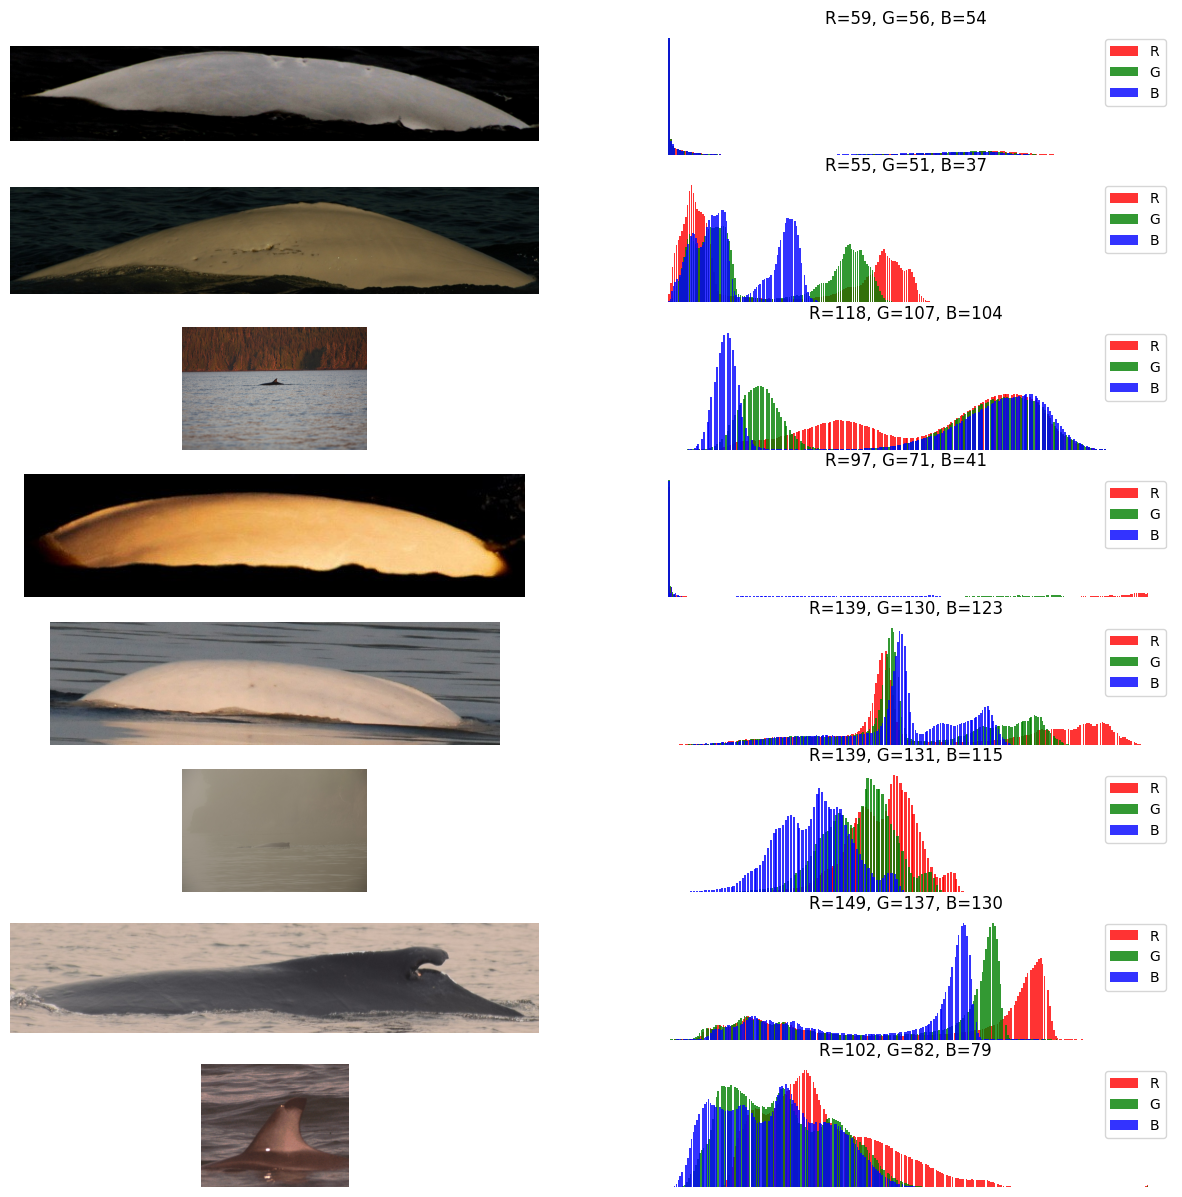

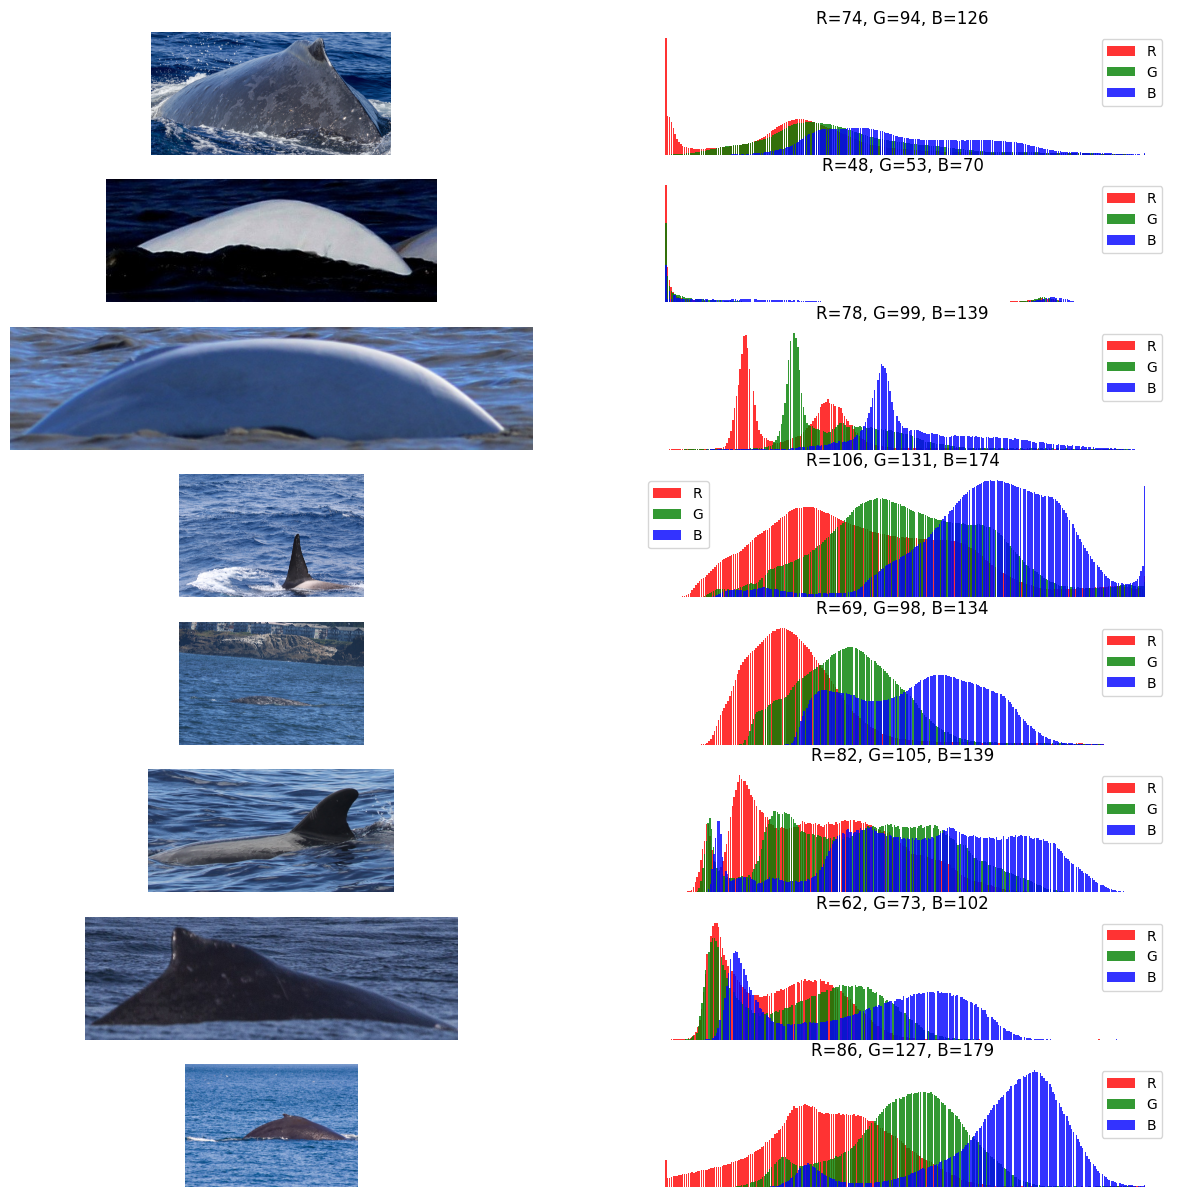

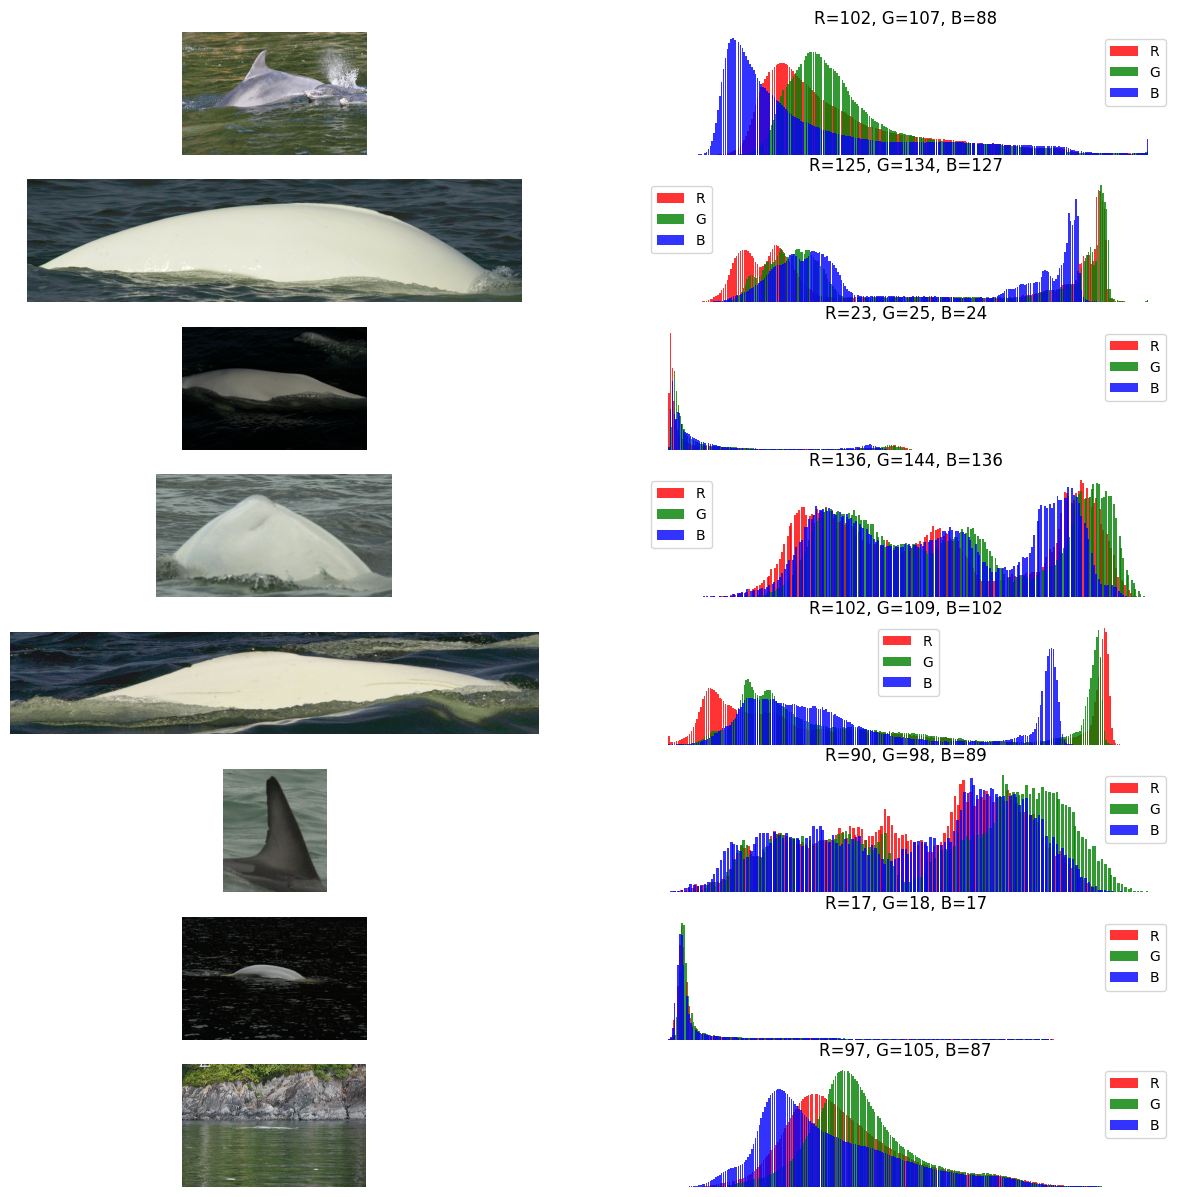

In [6]:


def show_color_dist(df, count):
    fig, axr = plt.subplots(count,2,figsize=(15,15))
    for idx, i in enumerate(np.random.choice(df['path'], count)):
        img = cv2.imread(i)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axr[idx,0].imshow(img)
        axr[idx,0].axis('off')
        axr[idx,1].set_title('R={:.0f}, G={:.0f}, B={:.0f} '.format(np.mean(img[:,:,0]), np.mean(img[:,:,1]), np.mean(img[:,:,2]))) 
        x, y = np.histogram(img[:,:,0], bins=255)
        axr[idx,1].bar(y[:-1], x, label='R', alpha=0.8, color='red')
        x, y = np.histogram(img[:,:,1], bins=255)
        axr[idx,1].bar(y[:-1], x, label='G', alpha=0.8, color='green')
        x, y = np.histogram(img[:,:,2], bins=255)
        axr[idx,1].bar(y[:-1], x, label='B', alpha=0.8, color='blue')
        axr[idx,1].legend()
        axr[idx,1].axis('off')


print("Images with high intensity of R channel")
df = train_df[((train_df['B']*1.05) < train_df['R']) & ((train_df['G']*1.05) < train_df['R'])]
show_color_dist(df, 8)


print("Images with high intensity of G channel")
df = train_df[(train_df['B'] > 1.3*train_df['R']) & (train_df['B'] > 1.3*train_df['G'])]
show_color_dist(df, 8)

print("Images with high intensity of B channel")
df = train_df[(train_df['G'] > 1.05*train_df['R']) & (train_df['G'] > 1.05*train_df['B'])]
show_color_dist(df, 8)

In [19]:


from tensorflow.keras.preprocessing.image import ImageDataGenerator
from numpy import expand_dims

from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt

import torch
from torchvision.transforms import v2

(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)


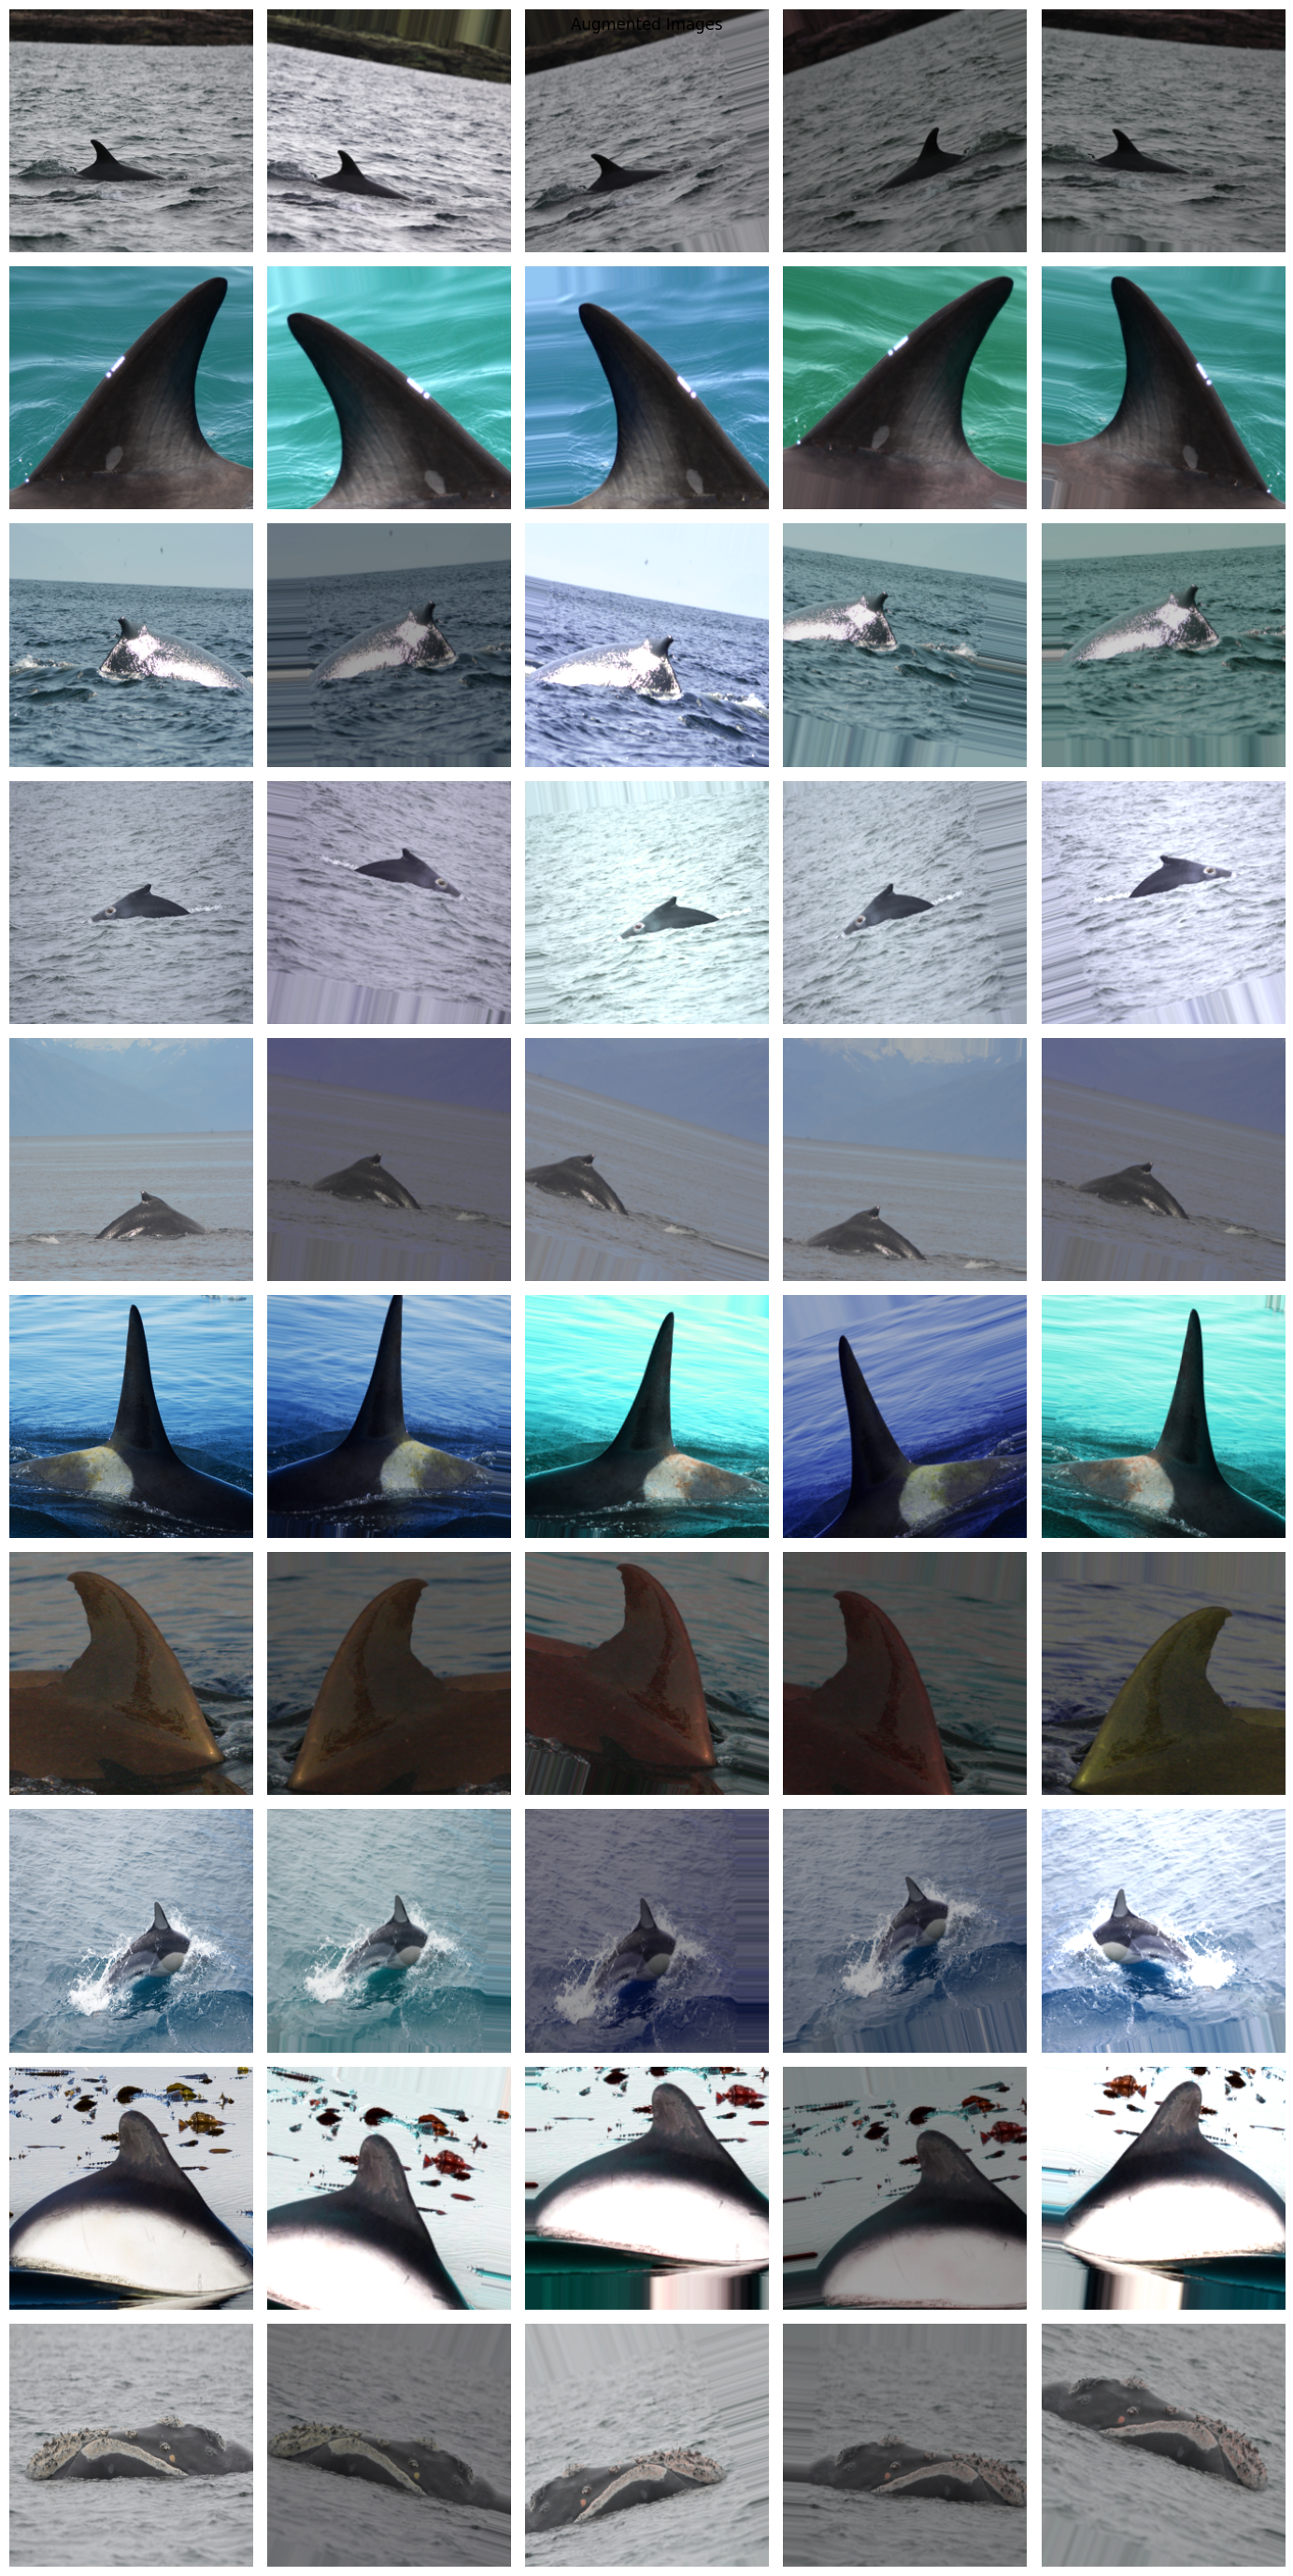

In [49]:
def plot_augimages(paths, datagen):
    plt.figure(figsize = (14,28))
    plt.suptitle('Augmented Images')
    
    midx = 0
    for path in paths:
        data = Image.open(path)
        data = data.resize((224,224))
        samples = expand_dims(data, 0)
        print(samples.shape)
        it = datagen.flow(samples, batch_size=1)
    
        # Show Original Image
        plt.subplot(10,5, midx+1)
        plt.imshow(data)
        plt.axis('off')
    
        # Show Augmented Images
        for idx, i in enumerate(range(4)):
            midx += 1
            plt.subplot(10,5, midx+1)
            
            batch = next(it)
            image = batch[0].astype('uint8')
            jitter = v2.ColorJitter(hue=0.1)
            image = jitter(torch.tensor(image).permute(2,0,1)).permute(1,2,0).numpy()
            plt.imshow(image)
            plt.axis('off')
        midx += 1
    
    plt.tight_layout()
    plt.show()

    
datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.10,
    brightness_range=[0.6,1.4],
    channel_shift_range=0.7,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest'
) 
plot_augimages(np.random.choice(train_df['path'],10), datagen)

In [34]:
datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.10,
    brightness_range=[0.6,1.4],
    channel_shift_range=0.7,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest'
)
aug_img = 5
unique_individual_ids = train_df['individual_id'].unique()
num_rows = 0
for individual_id in tqdm(unique_individual_ids):
    c = train_df.loc[train_df['individual_id'] == individual_id, 'count'].unique()[0]
    if c < aug_img:
        c = aug_img
    num_rows += c
print(num_rows)
print(len(train_df))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15587/15587 [00:30<00:00, 509.06it/s]

99625
51033


In [38]:
train_df.head()

image             species individual_id  \
0  00021adfb725ed.jpg  melon_headed_whale  cadddb1636b9   
1  000562241d384d.jpg      humpback_whale  1a71fbb72250   
2  0007c33415ce37.jpg  false_killer_whale  60008f293a2b   
3  0007d9bca26a99.jpg  bottlenose_dolphin  4b00fe572063   
4  00087baf5cef7a.jpg      humpback_whale  8e5253662392   

                                                path    class  count  
0  ./happy-whale-and-dolphin/train_images/00021ad...    whale      1  
1  ./happy-whale-and-dolphin/train_images/0005622...    whale      2  
2  ./happy-whale-and-dolphin/train_images/0007c33...    whale     64  
3  ./happy-whale-and-dolphin/train_images/0007d9b...  dolphin     65  
4  ./happy-whale-and-dolphin/train_images/00087ba...    whale     50

In [66]:
datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.10,
    brightness_range=[0.6,1.4],
    channel_shift_range=0.7,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_df = pd.read_csv(HWAD + 'train2.csv')
train_df.drop(columns=["width","height","dimension","R","G","B"], inplace=True)

aug_img = 5

aug_train_df = pd.DataFrame(index=range(num_rows), columns=train_df.columns)
aug_i = 0
jitter = v2.ColorJitter(hue=0.1)
for index, row in tqdm(train_df.iterrows()):
    image = Image.open(row['path'])
    image = image.convert('RGB')
    image = image.resize((256,256))
    aug_train_df.loc[aug_i] = row
    image.save(HWAD + "aug_train/" + row['image'])
    aug_train_df.loc[aug_i] = row
    aug_train_df.loc[aug_i, 'path'] = HWAD + "aug_train/" + row['image']
    aug_train_df.loc[aug_i, 'count'] = aug_img if row['count'] < aug_img else row['count']
    aug_i += 1
    if row['count'] < aug_img:
        razlika = aug_img - row['count']
        row['count'] = aug_img
        train_df.loc[train_df['individual_id'] == row['individual_id'], 'count'] = aug_img
        samples = expand_dims(image, 0)
        it = datagen.flow(samples, batch_size=1)
        for i in range(razlika):
            batch = next(it)
            image = batch[0].astype('uint8')
            image = jitter(torch.tensor(image).permute(2,0,1)).permute(1,2,0).numpy()
            image = Image.fromarray(image)
            new_path = HWAD + "aug_train/" + row['image'].split('.')[0] + '_' + str(i) + '.jpg'
            image.save(new_path)
            aug_train_df.loc[aug_i] = row
            aug_train_df.loc[aug_i, 'image'] = row['image'].split('.')[0] + '_' + str(i) + '.jpg'
            aug_train_df.loc[aug_i, 'path'] = new_path
            aug_i += 1

aug_train_df.to_csv(HWAD + 'aug_train.csv', index=False)


0it [00:00, ?it/s]


KeyError: 'cannot use a single bool to index into setitem'